# A library of mark scaling functions which preserve endpoints.

## The following scaling functions are available:

In [1]:
import lesterScaling
lesterScaling.scaling_functions

[<function lesterScaling.hyperbolic(x, p)>,
 <function lesterScaling.skewSymmetric(x, p)>,
 <function lesterScaling.skewTopHinged(x, p)>,
 <function lesterScaling.skewBottomHinged(x, p)>,
 <function lesterScaling.cappedLinearBottomHinged(x, p)>,
 <function lesterScaling.cappedLinearTopHinged(x, p)>]

## Example usage:

In [2]:
import lesterScaling

raw_marks = [ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ]

max_mark = 100   # The maximum possible mark, not the largest mark obtained.

p_value = 0.05   # Parameter to choose how strong the mark scaling should be. 

# Scale the above raw marks and round to one decimal place using the "hyperbolic" scaling function:
scaled_marks_1 = [ round(lesterScaling.hyperbolic(raw_mark/max_mark, p_value)*max_mark, 1) \
                    for raw_mark in raw_marks ]

print("The hyperbolic scaling option with strength p="+str(p_value)+" scales these raw marks:\n")
print("     "+str(raw_marks))
print("")
print("to these scaled marks:\n")
print("     "+str(scaled_marks_1)+".")

# Scale the above raw marks and round to one decimal place using the "skewMean" scaling function:
scaled_marks_2 = [ round(lesterScaling.skewSymmetric(raw_mark/max_mark, p_value)*max_mark, 1) \
                    for raw_mark in raw_marks ]

print("")
print("Alternatively, for the same scaling strength the skewSymmetric scaling function would generate:\n")
print("     "+str(scaled_marks_2)+".\n")



The hyperbolic scaling option with strength p=0.05 scales these raw marks:

     [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

to these scaled marks:

     [0.0, 11.9, 23.4, 34.4, 44.9, 55.0, 64.7, 74.0, 83.0, 91.6, 100.0].

Alternatively, for the same scaling strength the skewSymmetric scaling function would generate:

     [0.0, 11.7, 22.6, 33.1, 43.4, 53.5, 63.3, 73.0, 82.4, 91.5, 100.0].



## Dependencies

lesterScaling has no dependencies if you use only the skew scaling functions.

lesterScaling depends on numpy if you use the hyperbolic or capped linear scaling functions.

lesterScaling depends on matplitlib if you use its built-in scaling function drawing methods.


## General notes applicable to all scaling functions:

Each of the scaling functions provided in this library is is a function $f(x,p)$ 
defined on $x\in[0,1]$ and $p\in (-1,+1)$ and continuous in $x$ and $p$ with the following properties::

1. $f(x,p)\in[0,1]\qquad$ (i.e. marks stay in-range),
2. $f(x,0) = x\qquad$ (i.e. $p=0$ always leads to the trivial mapping $f : x \mapsto x$),
3. $\lim_{p\rightarrow+1} f(x,p) = 1$ for all $x\in (0,1]\qquad$ (i.e. $p\rightarrow+1$ corresponds to maximal up-scaling), and
4. $\lim_{p\rightarrow-1} f(x,p) = 0$ for all $x \in [0,1)\qquad$ (i.e. $p\rightarrow-1$ corresponds to maximal down-scaling).
5. $f(x,p) < f(y,p)  \implies x < y\qquad$  (i.e. a candidate who looks worse (or better) than another after scaling was worse (or better) before scaling)

### Strict Rank Preservation

If the scaling function $f(x,p)$ additionally satisfies:

6. $f(x,p) < f(y,p) \iff x < y\qquad$ 

then the scaling function is said to be **strictly rank preserving**.   The rank preserving Property 6 is is a stronger version of Property 5 (and in fact implies 5).  Property 6 only creates post-scaling ties where those ties existed before scaling, whereas Property 5 does not prevent students becoming tied post-scaling who were not tied before.

Other users need not agree, but the author takes the view that property 6 is much to be favoured over property 5, as nothing makes an examinee more angry than discoving that their work counted for nothing.

### Endpoint Preservation
If the scaling function $f(x,p)$ additionally satisfies:

7. $f(1,p) = 1\qquad$
8. $f(0,p) = 0\qquad$ 

then it is said to be **endpoint preserving** (i.e. people who get 0% or 100% before scaling get the same mark after scaling).

### Usage

A scaling function, $f(x,p)$, could be used to scale individual raw marks as follows:

        scaled_mark = max_mark * f(raw_mark/max_mark, p)

where max_mark is the largest mark possible (usually 100), and "$p$" is a strength of the scaling.

Note that the non-linear nature of these scaling functions means that the value of 
$p$ needed to achieve any given movement of the mean of the distrubution being scaled cannot usually be found without iteration. 
However, it is a simple matter to play a shooting-game to establish
the correct value of $p$ to any desired mean movement as the family of functions is 
monotonic in $p$ (and $x$).



## Hyperbolic scaling function:

### Pros:
* This scaling function is **strictly rank preserving**.
* Very symmetric and easy to define conceptually.
* Conceptual definition has impartiality (not favouring/disfavouring any particular class of student) at its core.
### Cons
* Implementation must consider and work around instability at $p=0$.
* Algebraic forumla looks opaque.
* No scaling function is ever truly impartial. Each is arbitrary it its own way.
### Formula:

These are the UNIQUELY determined family of hyperbolae (in $(x,f(x,p))$-space) with the following properties:
*  each hyperbola passes through the top right and bottom left corners of the unit square with corners (0,0) amd (1,1), 
*  each hyperbola is symmetric about the diagonal running from top-left to bottom right of that unit square,
*  the location of the midpoint of each hyperbola,  $\text{mid}(p)$, satisfies: $\text{mid}(p) = (1/2 - p/2, 1/2 + p/2)$ ... i.e.  the last-mentioned diagonal is traversed at uniform speed if "$p$" 
           is varied at constant speed, and 
* they hyperbolae are assymptotic to the boundaries of the unit square at as $p$ tends to $\pm1$.

The above requirements force:
$$f(x,p) = { {b - \sqrt{b^2-ac}} \over a }$$

where

$$s = \text{sign} (p),$$

$$a=(1-|p|)^2,$$

$$b=a(1-x) + 2x + s-1,$$
and
$$c=x (a(x-2) + 2s + 2).$$

A naive implementation of above function would be susecptible to numerical instability for $p$ close to zero, so in the acutal implementation a conditioner is used to prevent that problem.


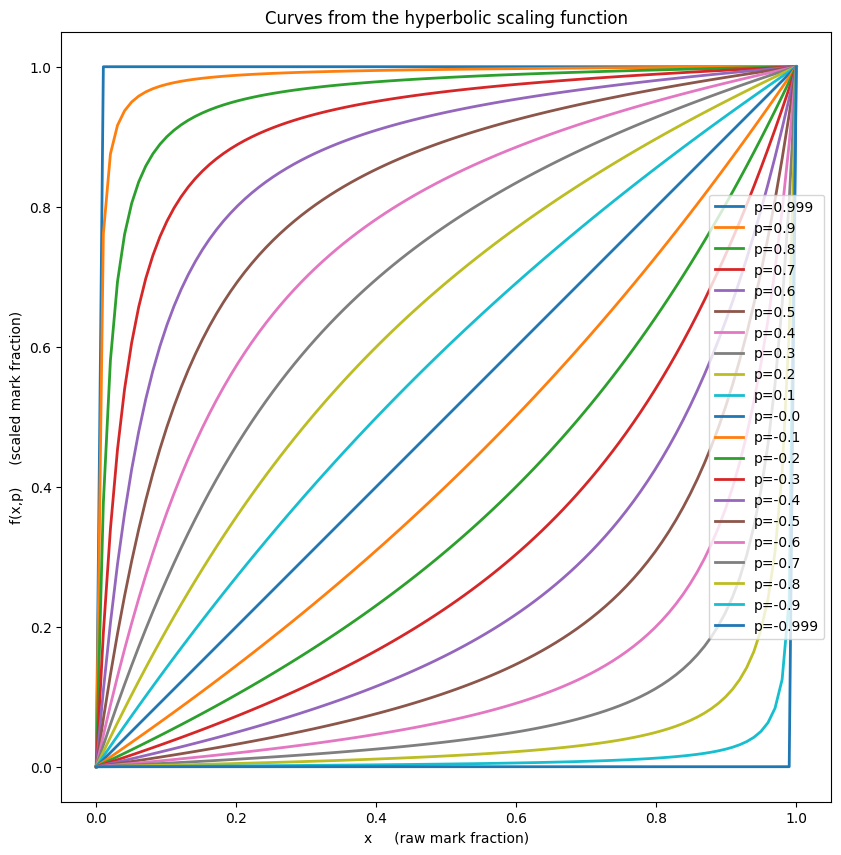

In [3]:
lesterScaling.plot_scaling_function_curves(functions=(lesterScaling.hyperbolic,))

## "Top Hinged" Skew scaling function:

### Pros:
* This scaling function is **strictly rank preserving**.
* Simple algebraic formula.
* No numerical instability.
* Good if you want approximately a linear stretch centered on 100%.
### Cons
* Formula is totally arbitrary (i.e. it is not constructed with any particular ideas of fairness in mind).
* It rescales low marks very differently to high marks. It may therfore not be percieved as impartial.
* No scaling function is ever truly impartial. Each is arbitrary it its own way.
### Notes:
The top hinged skew scaling functioins are the bottom hinged ones rotated by 180 degrees about the centre of the unit square.

### Formula:
$$ f(x,p) = x^{\frac {1-p}{1+p}}$$

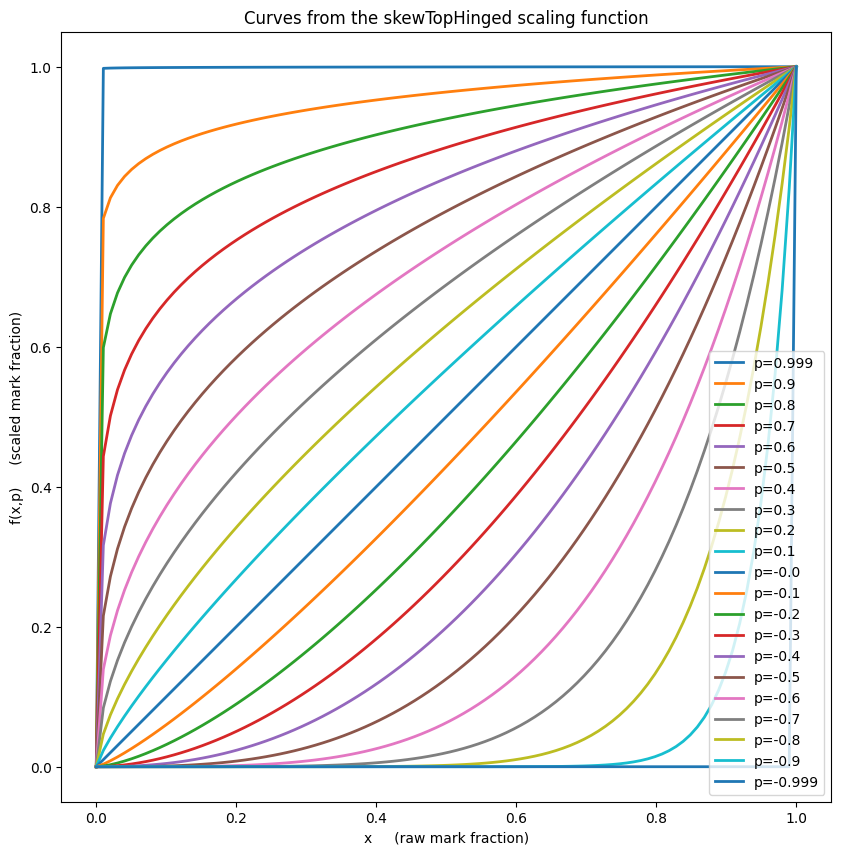

In [4]:
lesterScaling.plot_scaling_function_curves(functions=(lesterScaling.skewTopHinged,))

## "Bottom Hinged" Skew scaling function:

### Pros:
* This scaling function is **strictly rank preserving**.
* Simple algebraic formula.
* No numerical instability.
* Good if you want approximately a linear stretch centered on 0%.
### Cons:
* Formula is totally arbitrary (i.e. it is not constructed with any particular ideas of fairness in mind).
* It rescales low marks very differently to high marks. It may therfore not be percieved as impartial.
* No scaling function is ever truly impartial. Each is arbitrary it its own way.

### Notes:
The bottom hinged skew scaling functioins are the top hinged ones rotated by 180 degrees about the centre of the unit square.
### Formula:
$$f(x,p) = 1-(1-x)^{\frac {1+p}{1-p}}$$


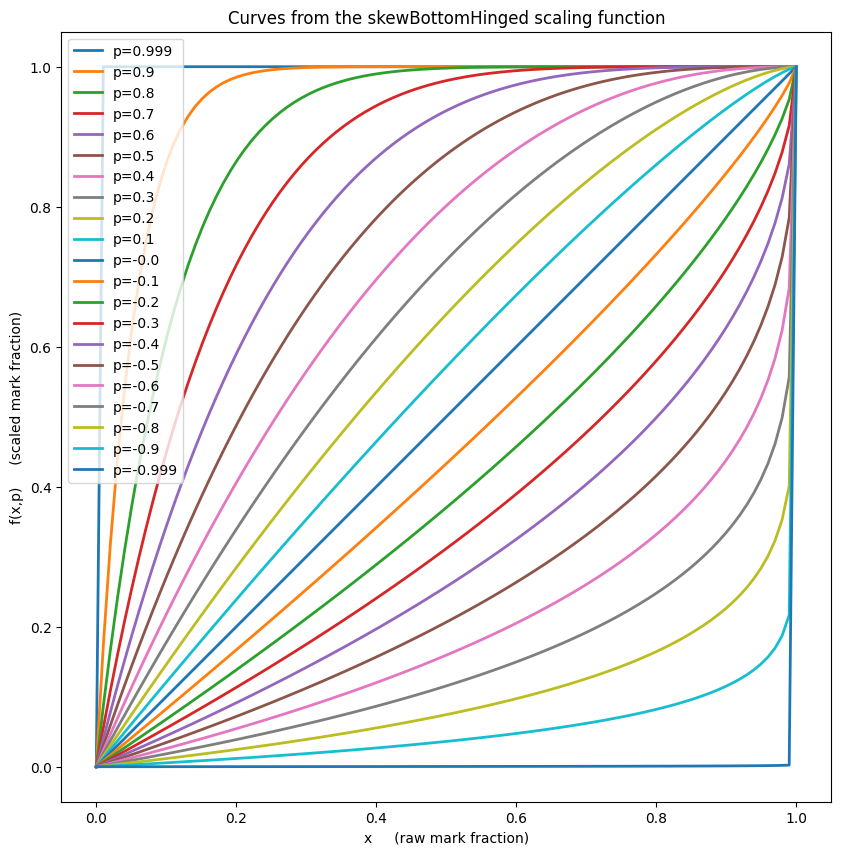

In [5]:
lesterScaling.plot_scaling_function_curves(functions=(lesterScaling.skewBottomHinged,))

## "Symmetric" Skew scaling function:

### Pros:
* This scaling function is **strictly rank preserving**.
* Simple algebraic formula.
* No numerical instability.
* Formula is marginally less arbitrary than the other **skew** scaling functions, as it at least attempts to treat people in the top x% of the mark range symmetrically to how it treats the people in the bottom x% of the mark range.
### Cons:
* Formula is still fairly arbitrary.
* No scaling function is ever truly impartial. Each is arbitrary it its own way.

### Formula:
$$f(x,p) = \frac  1 2 (t(x,p) + b(x,p))$$
where $t(x,p)$ and $b(x,p)$ are the top and bottom hinged skew scaling functions.


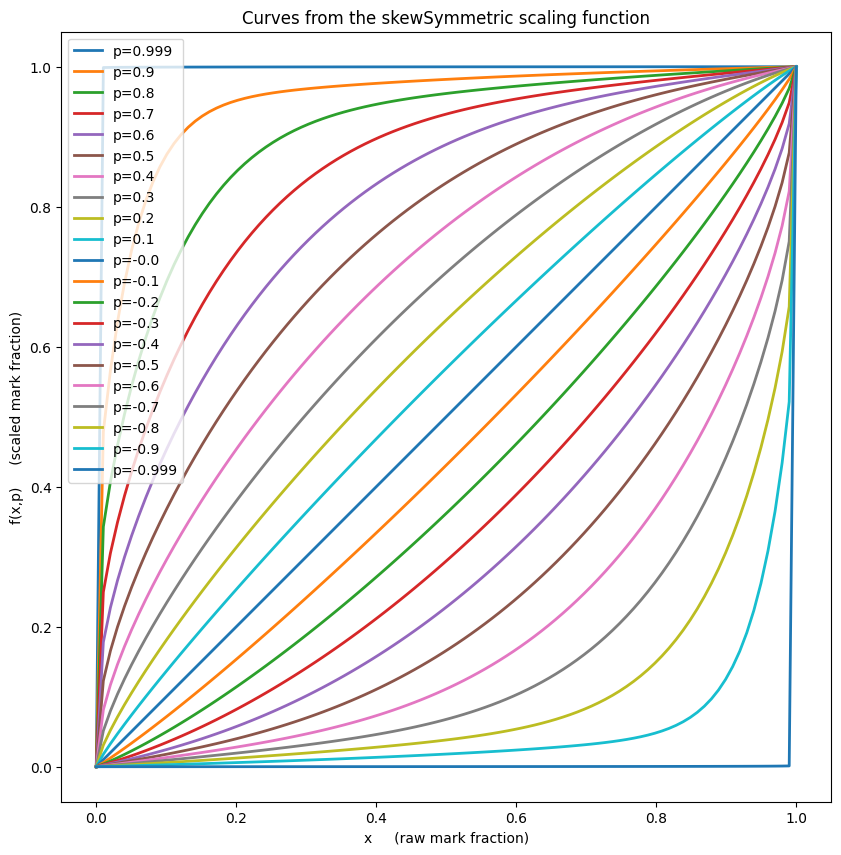

In [6]:
lesterScaling.plot_scaling_function_curves(functions=(lesterScaling.skewSymmetric,))

## "Bottom Hinged" capped linear scaling function:

### Pros:
* Simple algebraic formula.
* No numerical instability.
* Good if you want approximately a linear stretch centered on 0%.
### Cons:
* This scaling function is **not** strictly rank preserving when $p>0$, i.e. it can create ties where ties did not exist before scaling - meaning that some students' work is effectively "ignored".
* This scaling function is **not** endpoint preserving when $p<0$ as people with 100\% are given less after scaling.
* When $p>0$ it rescales low marks very differently to high marks. It may therfore not be percieved as impartial.
* This scaling function is not smooth (although it is continuous) so its use can lead to artefacts appearing in derived distributions.
* No scaling function is ever truly impartial. Each is arbitrary it its own way.

### Notes:
The bottom hinged cappd linear scaling functions are the top hinged ones rotated by 180 degrees about the centre of the unit square.
### Formula:
$$f(x,p) = \min{\left(x \cdot\frac{1+p}{1-p},\ 1\right)}$$


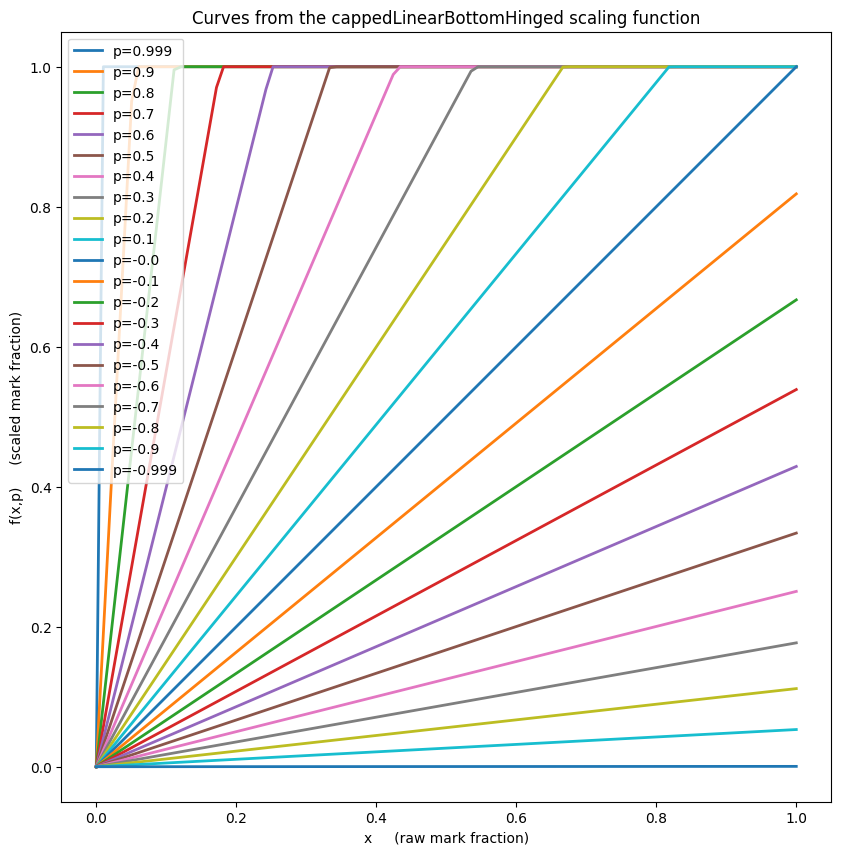

In [7]:
lesterScaling.plot_scaling_function_curves(functions=(lesterScaling.cappedLinearBottomHinged,))

## "Top Hinged" capped linear scaling function:

### Pros:
* Simple algebraic formula.
* No numerical instability.
* Good if you want approximately a linear stretch centered on 100%.
### Cons:
* This scaling function is **not** strictly rank preserving when $p<0$, i.e. it can create ties where ties did not exist before scaling - meaning that some students' work is effectively "ignored".
* This scaling function is **not** endpoint preserving when $p>0$ as people with 0\% are given more after scaling.
* When $p<0$ it rescales low marks very differently to high marks. It may therfore not be percieved as impartial.
* This scaling function is not smooth (although it is continuous) so its use can lead to artefacts appearing in derived distributions.
* No scaling function is ever truly impartial. Each is arbitrary it its own way.

### Notes:
The bottom hinged cappd linear scaling functions are the top hinged ones rotated by 180 degrees about the centre of the unit square.
### Formula:
$$f(x,p) = 1- \min{\left((1-x) \cdot\frac{1-p}{1+p},\ 1\right)}$$


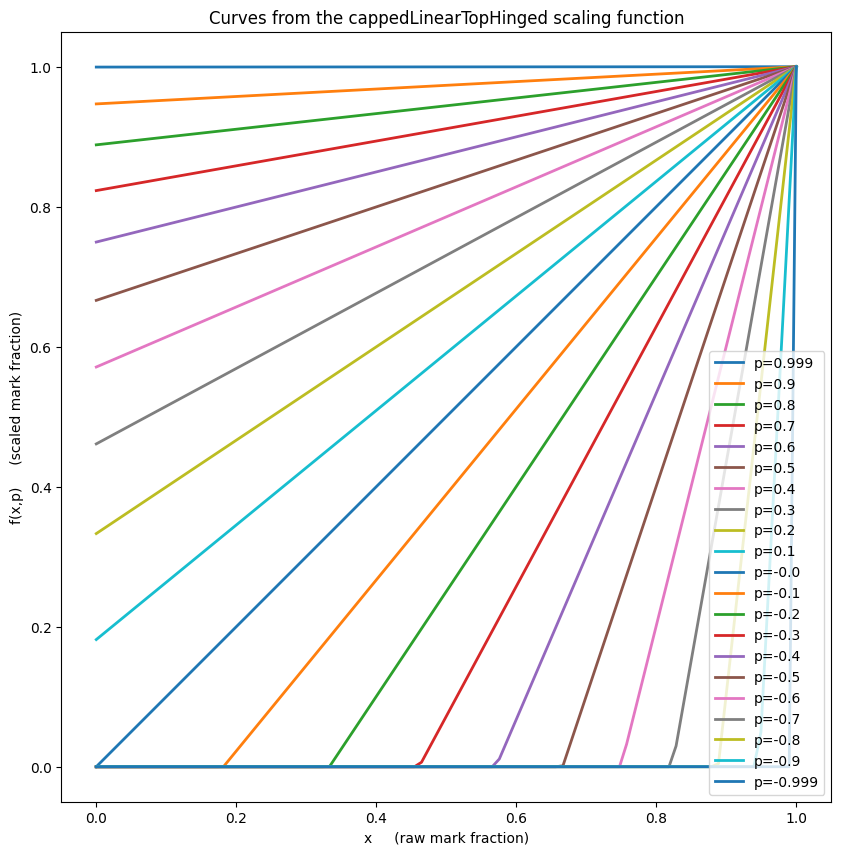

In [8]:
lesterScaling.plot_scaling_function_curves(functions=(lesterScaling.cappedLinearTopHinged,))